# Loan Data From Prosper - Data Exploration
## By Hudson Nandere Lubinga

## Investigation Overview
The goal of this analysis is to explore a number of variables to determine the segmentation of borrowers who receive different loan amounts and interest rates.

Here is the summary of the key insights:
- The distibution of Loan Amount is multimodal. It has several peaks and the most popular loan amounts are 4,000, 15,000 and 10,000.
- Borrowers are segmented by whether they own a house or not. It is observed that home owners borrow higher amounts more frequently
- Loan Amounts is affects Interest rate and monthly payments. It is observed that the higher the loan amounts, the lower the interest rate and the higher the monthly payments

## Dataset Overview

- The 'Loan Data From Prosper' data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
- Prosper is the first peer-to-peer lending marketplace in the US founded way back in 2005. Since then, this company has facilitated more than USD 12 billion in loans to more than 770,000 people.
- Source: https://www.prosper.com/about

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# Load the dataset into a data frame
df_target = pd.read_csv('prosperLoanData_target.csv')

## The distribution of Loan Amount

- The distibution of Loan Amount is multimodal. It has several peaks and the most popular loan amounts are 4,000, 15,000 and 10,000. 

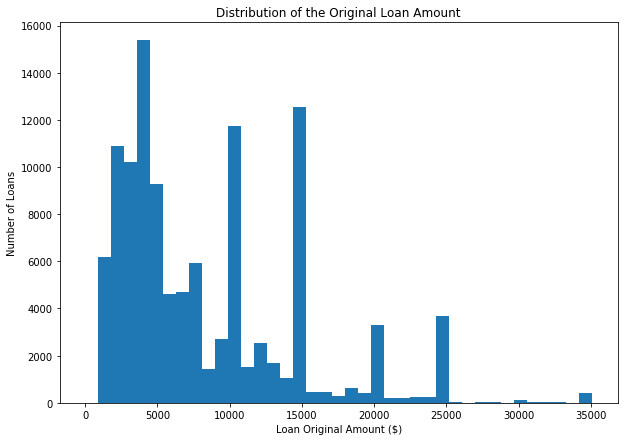

In [3]:
plt.figure(figsize=(10,7))
plt.title('Distribution of the Original Loan Amount')
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Number of Loans')
bins = np.arange(0, df_target['LoanOriginalAmount'].max()+900, 900)
plt.hist(data = df_target, x = 'LoanOriginalAmount', bins = bins);

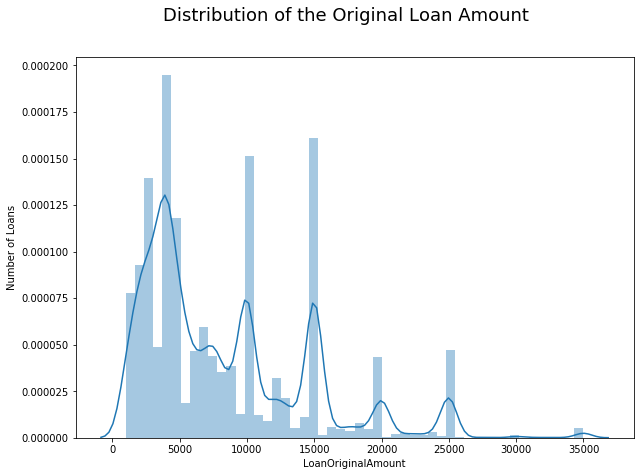

In [4]:
plt.figure(figsize=(10,7))
plt.suptitle('Distribution of the Original Loan Amount', size='18')
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Number of Loans')
bins = np.arange(0, df_target['LoanOriginalAmount'].max()+900, 900)
sb.distplot(df_target['LoanOriginalAmount']);

## Borrowers Segmentation by house

- Borrowers are segmented by whether they own a house or not.
- It is observed that home owners borrow higher amounts more frequently

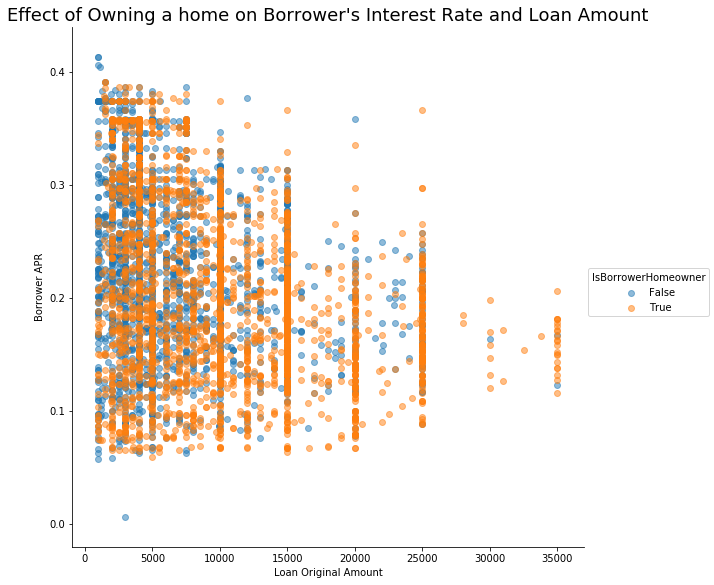

In [5]:
# Take a sample of 5000 from the dataset
sample = np.random.choice(df_target.shape[0], 5000, replace = False)
df_samp = df_target.iloc[sample,:]

h = sb.FacetGrid(data = df_samp, hue = 'IsBorrowerHomeowner', size = 8)
h.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR', alpha = 0.5)
h.add_legend()
plt.title("Effect of Owning a home on Borrower's Interest Rate and Loan Amount", size = 18)
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR')
plt.show();

- It is observed that employed borrowers are the only group with strongly more home owners among others.

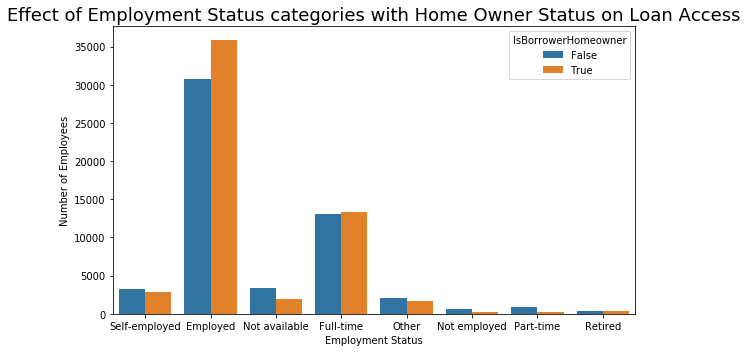

In [6]:
plt.figure(figsize = [10, 5])
sb.countplot(data = df_target, x = 'EmploymentStatus', hue = 'IsBorrowerHomeowner')
plt.title("Effect of Employment Status categories with Home Owner Status on Loan Access", size = 18)
plt.xlabel('Employment Status')
plt.ylabel('Number of Employees')
plt.tight_layout();

## Loan Amounts affects Interest rate and monthly payments
- It is observed that the higher the loan amounts, the lower the interest rate and the higher the monthly payments


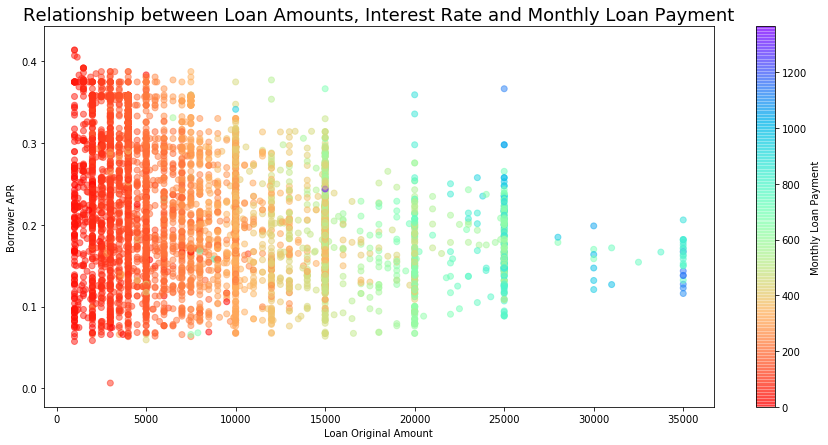

In [7]:
plt.figure(figsize=(15,7))
plt.scatter(data = df_samp, x = 'LoanOriginalAmount', y = 'BorrowerAPR', alpha = 1/2, c = 'MonthlyLoanPayment',
            cmap = 'rainbow_r')
plt.colorbar(label = 'Monthly Loan Payment')
plt.title("Relationship between Loan Amounts, Interest Rate and Monthly Loan Payment", size=18)
plt.ylabel('Borrower APR')
plt.xlabel('Loan Original Amount')
plt.show()

## Summary of Findings
Below is the summary of the main findings:
- The amount that is most frequently loaned is 4,000, followed by 15,000 and then 10,000.
- The interest rate variables, BorrowerAPR and BorrowerRate contain the same information.
- Borrower APR is negatively correlated with the loan original amount. Borrower APR is negatively correlated with credit score range lower.
- There is a positive correlation between loan original amount with monthly loan payment and with credit score.
- Higher income borrowers and home owners borrow higher amounts for lower rates compared with lower income borrowers.
- Unemployed borrowers pay the highest interest among all employment statuses.
- The higher the loan amounts, the lower the interest rate and the higher the monthly payments
- Borrowers who do not own a house pay a higher interest throughout the years
- Borrowers who own a house borrow more money on average throughout the years
- There is an upward trend in Loan Amounts for the last few years.
- Borrowers with higher income rates more frequently receive higher Loan Amounts through the years.

## Conclusion
- This Analysis is limited to only a few variables. Because of time contraint, even the 20 variables of interest selected were not all explored.
- More exploration is required in the area of Credit Rating and Propser rating most especially on how they affect or relate to our variables of interest, i.e, Interest Rate and Loan Amount.
- I recommend that further exploration be made to determine if Credit Ratings segment borrowers.